In [1]:
# From https://www.tensorflow.org/tutorials/keras/basic_text_classification

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.9.0


In [3]:
# Download IMDB database
imdb = keras.datasets.imdb
# num_words=10000 only keeps top 10,000 most frequently occurring words.  Discards rare words to keep data size manageable.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 9s 1us/step


In [4]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [5]:
# Text has been converted into integers.
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
# Reviews have different lengths.  Need to fix this since inputs to NN must be same length.
# Example:
print("Length of train_data[0] = {}".format(len(train_data[0])))
print("Length of train_data[1] = {}".format(len(train_data[1])))

Length of train_data[0] = 218
Length of train_data[1] = 189


In [7]:
# Convert integers back into words
# Dictionary maps words to an integer index
word_index = imdb.get_word_index()

# First indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    # Default value is '?' for the dictionary get.
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 1s 1us/step


In [8]:
# Test decode_review
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

# Prepare the data

In [9]:
# Reviews (arrays of integers) must be converted to tensors.  This can be done in several ways:
# 1) one-hot-encode the arrays to convert them into vectors of 0s and 1s.  This requires num_words * num_reviews size Matrix and is memory intensive.
# 2) Pad the arrays to all have the same length. Create tensor of shape num_examples * max_length.
train_data = keras.preprocessing.sequence.pad_sequences(train_data, 
                                                        value=word_index["<PAD>"], 
                                                        padding='post', 
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data, 
                                                        value=word_index["<PAD>"], 
                                                        padding='post', 
                                                        maxlen=256)

In [10]:
# Reviews should have same length now
# Example:
print("Length of train_data[0] = {}".format(len(train_data[0])))
print("Length of train_data[1] = {}".format(len(train_data[1])))

Length of train_data[0] = 256
Length of train_data[1] = 256


In [11]:
# Inspect the first review (padded)
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

# Build the Model

In [12]:
# input shape is vocab count used for movie reviews.
vocab_size = 10000

model = keras.Sequential()
# Embedding layer takes integer-encoded vocab 
#  and looks up embedding vector for each word-index.
# Vectors add dimension to output array.
# Resulting dimensions are (batch, sequence, embedding).
model.add(keras.layers.Embedding(vocab_size, 16))
# GlobalAveragePooling1D returns fixed-length output vector
#  for each example by averaging over the sequence dimension.
# This allows model to handle input of variable length in simplest way.
model.add(keras.layers.GlobalAveragePooling1D())
# Fully-connected layer with 16 hidden units.
# The number of outputs (units, nodes, or neurons) is the dimension
# of the representational space for the layer.  In other words, the
# the amount of freedom the network is allowed when learning an
# internal representation.
# More hidden units (higher-dimensional representation space)
# and/or more layers allow network to learn more complex representations.
# However, run risk of overfitting.
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
# Last layer is densely connected with 1 output node.
# This represents probability, or confidence level
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


# Loss function and Optimizer

In [13]:
# binary_crossentropy is a good loss function since we are dealing with
# a single output probability.  It measures the "distance" between
# probability distributions, or in our case, between the ground-truth
# distribution and the predictions.

model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Create Validation Set

In [14]:
# We want to develop and tune our model using only the training data,
# and then use test data just once to evaluate our accuracy.

# Set aside 10,000 examples for validation.
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

# Train the Model

In [15]:
# Train model for 40 eopchs in mini-batches of 512 samples.
# While training, monitor the model's loss and accuracy on the 10,000 samples from validation set.

# Model.fit returns a Histroy object containing dictionary with everything that happened during training.
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 132us/step - loss: 0.6961 - acc: 0.5012 - val_loss: 0.6925 - val_acc: 0.5007
Epoch 2/40
15000/15000 [==============================] - 2s 109us/step - loss: 0.6901 - acc: 0.5749 - val_loss: 0.6889 - val_acc: 0.6024
Epoch 3/40
15000/15000 [==============================] - 2s 102us/step - loss: 0.6867 - acc: 0.6001 - val_loss: 0.6860 - val_acc: 0.5775
Epoch 4/40
15000/15000 [==============================] - 1s 91us/step - loss: 0.6829 - acc: 0.6461 - val_loss: 0.6830 - val_acc: 0.5436
Epoch 5/40
15000/15000 [==============================] - 1s 87us/step - loss: 0.6781 - acc: 0.6615 - val_loss: 0.6769 - val_acc: 0.6873
Epoch 6/40
15000/15000 [==============================] - 1s 94us/step - loss: 0.6717 - acc: 0.7110 - val_loss: 0.6701 - val_acc: 0.7076
Epoch 7/40
15000/15000 [==============================] - 1s 87us/step - loss: 0.6629 - acc: 0.7223 - val_loss: 0.6612 - val_

# Evaluate the Model

In [16]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 22us/step
[0.3038825902271271, 0.87532]


# Create graph of accuracy and loss over time

In [17]:
# Model.fit returns a Histroy object containing dictionary with everything that happened during training.
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# 'bo' is for 'blue dot'
plt.plot(epochs, loss, 'bo', label='Training loss')
# 'b' is for 'solid blue line'
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

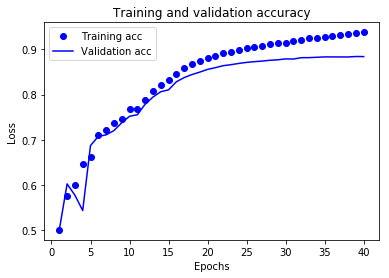

In [19]:
plt.clf() # Clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
# In above figure, dots represent training loss and accuracy.
# Solid lines are validation loss and accuracy.

# Training loss decreases and training accuracy increases with each epoch
# Validation loss and accuracy seem to peak after 20 epochs.
# This is sign of overfitting. Model performs better on training data
# than on data is has never seen before.
# After this point model over-optimizes and learns representations
# specific to training data that do not generalize to test data.

# For this particular case, we could have stopped training after 20 epochs or so.